# Events detection

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from events_detection import *

In [2]:
# Data examples 
data = pd.read_csv("../data/data_hists.csv", delimiter=";")

# Selecting one time series
name = 'Problemes/Client mécontent/insatisfait'
df = data[data[data.columns[0]] == name]
df = df.drop(df.columns[0],1)

def prtdt(l):
    return(str(l[2])+str(l[1])+str(l[0]))

df['Date'] = df['Date'].apply(lambda x: prtdt(x.split("/", 3)))

# Sorting according to date
df.sort_values("Date", axis=0, ascending=True, inplace=True)

ts = list(df['Somme'][0:300])

In [3]:
lag = 30
thresh = 1.5
influence = 0.5

signal, avg, std = peaks_detection(ts, lag=lag, thresh=thresh, influence=influence)

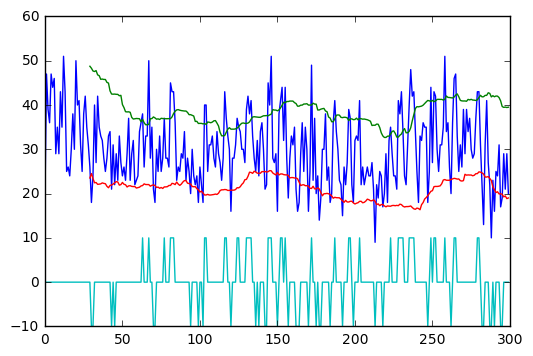

In [4]:
plt.plot(ts)
plt.plot(avg+std*thresh)
plt.plot(avg-std*thresh)
plt.plot(signal*10)

In [5]:
events = events_list(signal)
events

[(30, 32),
 (43, 44),
 (45, 46),
 (63, 64),
 (67, 68),
 (70, 72),
 (77, 78),
 (81, 84),
 (94, 95),
 (99, 100),
 (102, 103),
 (104, 105),
 (116, 118),
 (120, 121),
 (124, 126),
 (130, 134),
 (136, 137),
 (138, 139),
 (142, 144),
 (145, 147),
 (150, 151),
 (152, 154),
 (155, 156),
 (157, 158),
 (162, 165),
 (170, 171),
 (172, 173),
 (175, 176),
 (177, 179),
 (184, 185),
 (187, 188),
 (192, 193),
 (196, 198),
 (199, 200),
 (203, 204),
 (213, 214),
 (218, 219),
 (223, 224),
 (228, 232),
 (235, 239),
 (247, 248),
 (249, 250),
 (251, 253),
 (258, 259),
 (262, 263),
 (264, 266),
 (279, 281),
 (282, 284),
 (287, 289),
 (290, 291),
 (294, 296)]

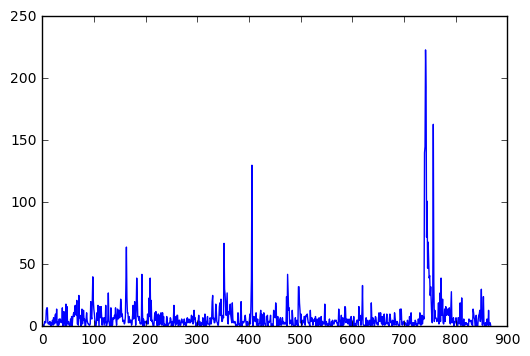

In [6]:
data = np.loadtxt('../data/recherche_seisme.txt')
plt.plot(data)

/home/jonathan/anaconda3/lib/python3.5/site-packages/statsmodels/tsa/filters/filtertools.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.r_[[np.nan] * head, x, [np.nan] * tail]


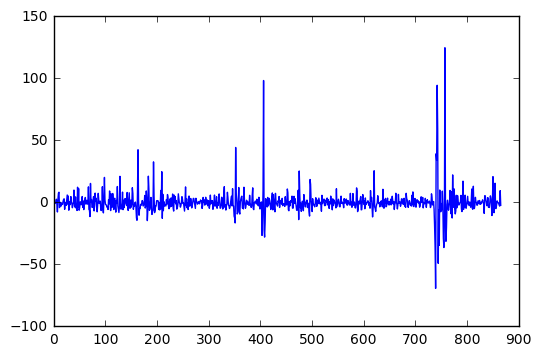

In [7]:
import statsmodels.api as sm

res = sm.tsa.seasonal_decompose(data, freq=7)
plt.plot(res.resid)

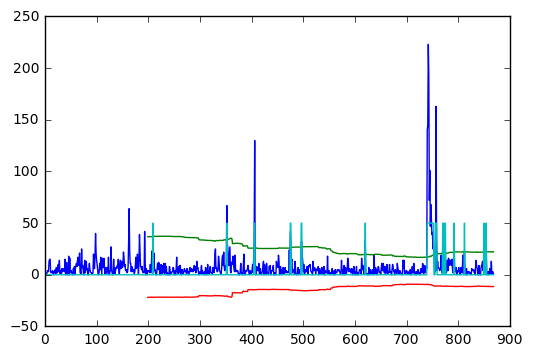

In [8]:
lag = 200
thresh = 3.5
influence = 0.01

signal, avg, std = peaks_detection(data, lag=lag, thresh=thresh, influence=influence)

plt.plot(data)
plt.plot(avg+std*thresh)
plt.plot(avg-std*thresh)
plt.plot(signal*50)
#plt.xlim((700,800))

(700, 800)

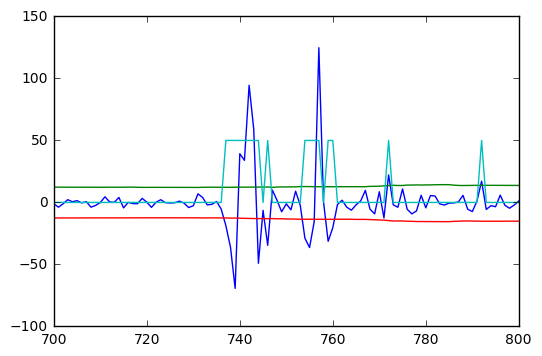

In [9]:
signal, avg, std = peaks_detection(res.resid, lag=lag, thresh=thresh, influence=influence)

plt.plot(res.resid)
plt.plot(avg+std*thresh)
plt.plot(avg-std*thresh)
plt.plot(abs(signal*50))
plt.xlim((700,800))